# (1) K-Means Clustering




In [1]:

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [3]:
### Making fake data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
print(y_true)

[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


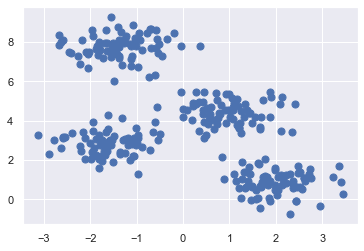

In [4]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50) # s is the size parameter

## Start the algorithm.   We need to pick K, and looking at the data it seems that there are 4 blobs.  So we will let k = 4.

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)  # make instance
kmeans.fit(X)  # Fit data   --- now everything is in kmeans
y_kmeans = kmeans.predict(X)  # show the results (or prediction)

plot

In [6]:
### What's going on ???
print(y_kmeans)

# group 0, 1, 2, 3 -> four groups

[2 1 0 1 2 2 3 0 1 1 3 1 0 1 2 0 0 2 3 3 2 2 0 3 3 0 2 0 3 0 1 1 0 1 1 1 1
 1 3 2 0 3 0 0 3 3 1 3 1 2 3 2 1 2 2 3 1 3 1 2 1 0 1 3 3 3 1 2 1 3 0 3 1 3
 3 1 3 0 2 1 2 0 2 2 1 0 2 0 1 1 0 2 1 3 3 0 2 2 0 3 1 2 1 2 0 2 2 0 1 0 3
 3 2 1 2 0 1 2 2 0 3 2 3 2 2 2 2 3 2 3 1 3 3 2 1 3 3 1 0 1 1 3 0 3 0 3 1 0
 1 1 1 0 1 0 2 3 1 3 2 0 1 0 0 2 0 3 3 0 2 0 0 1 2 0 3 1 2 2 0 3 2 0 3 3 0
 0 0 0 2 1 0 3 0 0 3 3 3 0 3 1 0 3 2 3 0 1 3 1 0 1 0 3 0 0 1 3 3 2 2 0 1 2
 2 3 2 3 0 1 1 0 0 1 0 2 3 0 2 3 1 3 2 0 2 1 1 1 1 3 3 1 0 3 2 0 3 3 3 2 2
 1 0 0 3 2 1 3 0 1 0 2 2 3 3 0 2 2 2 0 1 1 2 2 0 2 2 2 1 3 1 0 2 2 1 1 1 2
 2 0 1 3]


In [7]:
print(kmeans.cluster_centers_)

[[ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]]


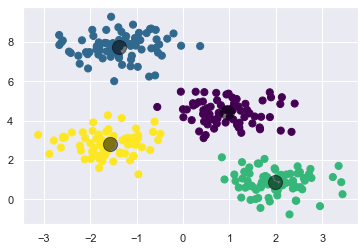

In [8]:
### (1) Plot the original data, 
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') # cmap is a color scheme which will make each cluster having a different color assigned

# get the centeriod of each cluster
centers = kmeans.cluster_centers_
# plot the centroids as well.
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);  # c is color, s is size, alpha is the tranparancy of the color

# (2) Hierarchical Clustering


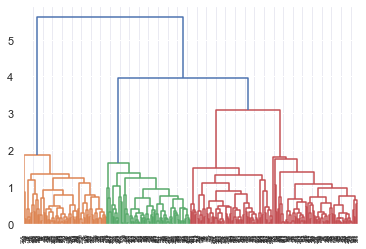

In [9]:
# Plot the data using a dendrogram
import scipy.cluster.hierarchy as sch
# doing the hierarchical clustering
clustered_data  = sch.linkage(X, method  = "average")
# drawing the dendrogram
dendrogram = sch.dendrogram(clustered_data)
plt.show()

In [10]:
#### To predict
from sklearn.cluster import AgglomerativeClustering
import numpy as np

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
#cluster.fit_predict(X)
cluster.fit_predict(np.array([[-1, 8], [-1, 2], [1, 4], [2, 1]]))

array([3, 1, 2, 0])

# HW 7: Question 2

**Boston house prices**

**Data Description**

Independent variable <br>
CRIM: Crime rate <br>
INDUS: Percentage of area of ​​non-retail commercial area <br>
NOX: nitrogen monoxide concentration <br>
RM: Number of rooms per house <br>
LSTAT: Percentage of lower classes in the population <br>
B: Percentage of black people in the population <br>
PTRATIO: Student/Teacher Ratio <br>
ZN: Percentage of residential area exceeding 25,000 square feet <br>
CHAS: 1 if located on the border of the Charles River, 0 otherwise. <br>
AGE: Percentage of homes built before 1940 <br>
RAD: Distance to radial highway <br>
DIS: Distance of job center <br>
TAX: Property tax rate <br>
<br>
Dependent variable <br>
Median 1978 home prices in 506 Boston towns ($1,000 per unit)

Divide the cluster into three by pulling the RM and AGE columns from the Boston house price data. 

The data is prepared in variable  data_X



Show results with 

(1) Kmeans with a plot including the data points and centroids

(2) hierarchical clustering with dendrogram



In [11]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 150
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
data_X = dfX[["RM", "AGE"]]


/Users/tt/miniforge3/envs/ds/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [12]:
data_X

,RM,AGE
0,6.575,65.2
1,6.421,78.9
2,7.185,61.1
3,6.998,45.8
4,7.147,54.2
...,...,...
501,6.593,69.1
502,6.120,76.7
503,6.976,91.0
504,6.794,89.3


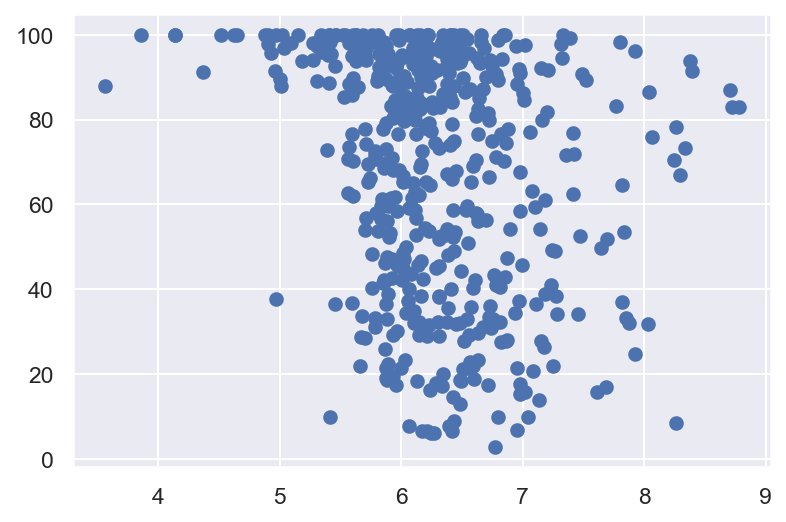

In [14]:
plt.scatter(data_X['RM'], data_X['AGE'])
# plt.savefig("scatter.jpg")

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_X)
y_kmeans = kmeans.predict(data_X)

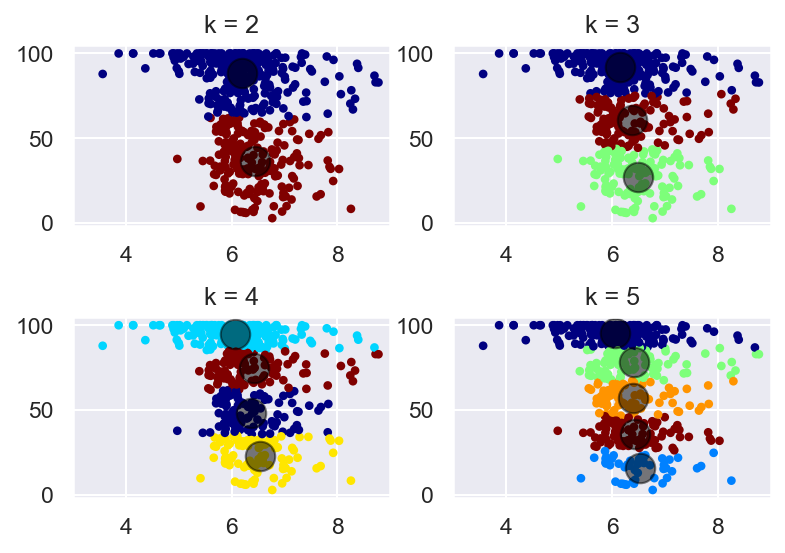

In [15]:
### Plot them 
### for k := 2 to 5
for i in range (2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_X)
    y_kmeans = kmeans.predict(data_X)
    plt.subplot(2, 2, i-1)
    plt.scatter(data_X['RM'], data_X['AGE'],c=y_kmeans, s=10, cmap='jet')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title(f"k = {i}")
    plt.xlim(3,9)
    plt.subplots_adjust(hspace=.5)
# plt.savefig("Kmeans.jpg")

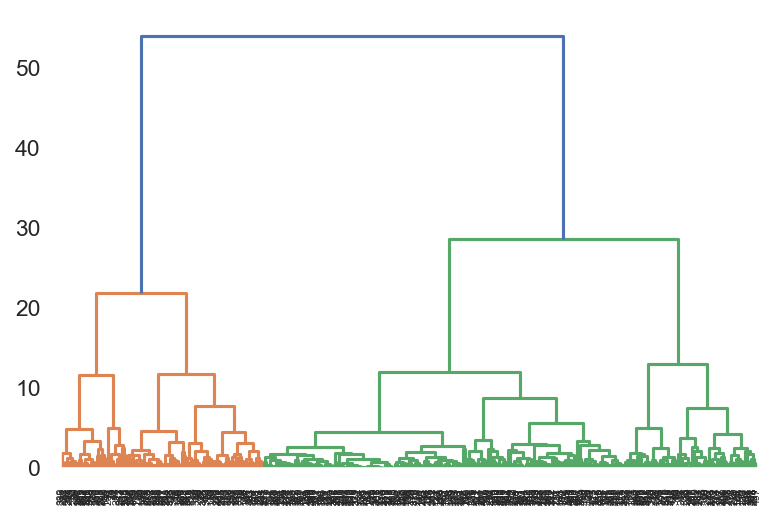

<Figure size 900x600 with 0 Axes>

In [16]:
clustered_data  = sch.linkage(data_X, method  = "average")
dendrogram = sch.dendrogram(clustered_data)
plt.show()
plt.savefig("dendrogram.jpg")

In [ ]:
#### To predict


cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
#cluster.fit_predict(X)
cluster.fit_predict(np.array([[-1, 8], [-1, 2], [1, 4], [2, 1]]))